### Face Recognition Attendance System
#### This project uses face recognition to automatically identify individuals from a webcam feed and mark their attendance. It relies on encoding facial features into 128-dimensional vectors using a pre-trained model and comparing them with known faces. Even with just a single image per person for training, the system performs well in recognizing faces in real-time.

In [1]:
import cv2
import os
import face_recognition
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\lenovo\\OneDrive\\Bureau\\ML_Projects\\Deep_Learning\\Face_recognition'

#### sets up the path to the images and print all the files in "images" folder

In [3]:
path = 'images'
images = []
classNames = []
myList = os.listdir(path)
print(myList)

['Araujo.webp', 'balde.png', 'CR7.jpg', 'cubarsi.webp', 'de Jong.jpg', 'Dr Zakir Naik.jpg', 'Elon Musk.jpg', 'halland.webp', 'kim jung un.jpg', 'kounde.webp', 'Leo Messi.jpg', 'Mohammed hijab.jpg', 'olmo.webp', 'Omar.jpg', 'pedri.webp', 'Putin.webp', 'raphinha.jpeg', 'Reda.jpg', 'stegen.webp', 'Yamal.jpeg']


#### reading the images as umpy arrays , storing them and storing the names of the files without extensions the names are the classes 

In [4]:
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

['Araujo', 'balde', 'CR7', 'cubarsi', 'de Jong', 'Dr Zakir Naik', 'Elon Musk', 'halland', 'kim jung un', 'kounde', 'Leo Messi', 'Mohammed hijab', 'olmo', 'Omar', 'pedri', 'Putin', 'raphinha', 'Reda', 'stegen', 'Yamal']


In [5]:
len(images)


20

#### Function to encode faces found in an image:
This algorithm applies a Convolutional Neural Network (CNN) to extract important features from each detected face. After passing the image through multiple convolutional layers (with many kernels), it generates a 128-dimensional feature vector (embedding) for each face. This embedding represents the unique characteristics of the face in a high-dimensional space, which can be used for comparison and identification.

In [6]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

This function ensures that a person is marked only once per session. It opens the Attendance.csv file, reads the existing entries, and checks if the detected name has already been logged. If not, it appends a new line with the person's name and the current timestamp.

In [7]:
def markAttendance(name):
    with open('Attendance.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%Y-%m-%d %H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

encodeListKnown = findEncodings(images)
print('Encoding Complete')

Encoding Complete


This part of the code performs all the processing required to recognize faces in the test frame.
First, the frame is resized to improve processing speed. Then, the locations of all detected faces in the resized frame are obtained to draw bounding boxes.
Next, we encode each detected face into a 128-dimensional feature vector. For every encoded face, we compare it against the previously known encoded faces using compare_faces, which returns a list of True or False values indicating potential matches.
We also calculate the distance between the current face and the known faces using face_distance, and find the index of the closest match (the smallest distance).
Using this index, we retrieve the corresponding name and draw a bounding box with the label on the original frame.


In [8]:
cap = cv2.VideoCapture(0)
frame_resizing = 0.25

while True:
    success, img = cap.read()
    imgS = cv2.resize(img, (0, 0), fx=frame_resizing, fy=frame_resizing)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
 
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
 
    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        print('matches',matches)
        faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
        print(faceDis)
        matchIndex = np.argmin(faceDis)
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            print(name)

            faceLoc = np.array(faceLoc)
            faceLoc = faceLoc / 0.25
            faceLoc=faceLoc.astype(int)
            y1, x2, y2, x1 = faceLoc[0], faceLoc[1], faceLoc[2], faceLoc[3]

            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img,(x1,y2),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(img,name,(x1,y1-10),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            markAttendance(name)
 
    cv2.imshow('Webcam',img)
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


matches [False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False]
[0.7335704  0.6933085  0.73022537 0.84752143 0.81621907 0.6927264
 0.83470414 0.88613672 0.92475862 0.71354538 0.82315671 0.65963223
 0.82798588 0.59306875 0.74963582 0.9373938  0.73700874 0.40437841
 0.87950741 0.77230692]
REDA
matches [False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False]
[0.70607231 0.67810727 0.72652615 0.84937284 0.821272   0.68791711
 0.8329909  0.8830131  0.91142372 0.70434567 0.81530178 0.6693741
 0.82556287 0.59509018 0.77374678 0.92460858 0.75380417 0.3889583
 0.87316648 0.7538178 ]
REDA
matches [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False]
[0.76837687 0.71246064 0.73159673 0.87083847 0.83063791 0.72095521
 0.84649835 0.90891345 0.91665624 

matches [False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False]
[0.72420747 0.72847444 0.76297245 0.83376862 0.86776076 0.64050664
 0.85231137 0.91170159 0.88639012 0.70980262 0.83049053 0.63902052
 0.85240484 0.59947689 0.73932487 0.91527771 0.75474196 0.33946364
 0.92959226 0.72087644]
REDA
matches [False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False]
[0.73334584 0.72475503 0.7414265  0.84845851 0.89072406 0.67999502
 0.84395066 0.93705131 0.89343159 0.72234893 0.82657906 0.63398517
 0.86850758 0.5688353  0.75559222 0.92968155 0.75154359 0.37184356
 0.93308963 0.74176769]
REDA
matches [False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False]
[0.73886434 0.7202969  0.73639556 0.85148454 0.88088976 0.65185381
 0.85746259 0.92780663 0.8860324

matches [False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
[0.76728448 0.7488043  0.78586578 0.75023257 0.83097564 0.66426516
 0.79811957 0.86375528 0.82803807 0.76385809 0.86018039 0.48976187
 0.82233931 0.65969567 0.71384323 0.77284145 0.6919246  0.6354702
 0.90994429 0.7373789 ]
MOHAMMED HIJAB
matches [False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
[0.77629906 0.75863325 0.7680174  0.74693415 0.81958762 0.6813425
 0.80182892 0.87116142 0.8318568  0.76091886 0.85651983 0.49224999
 0.84087687 0.64260128 0.70348141 0.77669883 0.70686065 0.64060788
 0.91901858 0.73331609]
MOHAMMED HIJAB
matches [False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False]
[0.7808368  0.75123257 0.7675578  0.73339787 0.79204132 0.68754568
 0.79482182

matches [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False]
[0.71072852 0.79075943 0.74897007 0.75218385 0.85546719 0.7011781
 0.79115355 0.84930188 0.88237799 0.75638906 0.7727917  0.70690901
 0.7786162  0.63325659 0.75958521 0.8992159  0.78149722 0.51498649
 0.82354946 0.76045509]
REDA
matches [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False]
[0.6716484  0.81202153 0.76968897 0.76359181 0.86704602 0.71440374
 0.79921439 0.84448913 0.89710271 0.76308112 0.76716222 0.71834448
 0.76566648 0.62959928 0.78148205 0.89119477 0.78724915 0.51400358
 0.81996792 0.77448604]
REDA
matches [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False]
[0.68099033 0.81842219 0.7799075  0.74089067 0.84012583 0.7356118
 0.7818038  0.82897498 0.892936

this is a test on a image that has faces but not in a high resolution and the algorithm found all the faces with a high precision this shows that this algorithm is very powerful and the architect behind is very intelligent

Number of faces found: 11
kounde
balde
stegen
raphinha
Araujo
cubarsi
Yamal
halland
de Jong
pedri
olmo


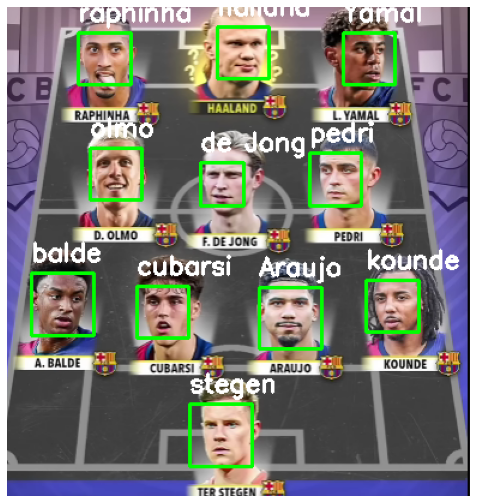

In [9]:
img = cv2.imread("barca_players.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect faces
face_locations = face_recognition.face_locations(img_rgb)
face_encodings = face_recognition.face_encodings(img_rgb, face_locations)
print("Number of faces found:", len(face_encodings))

# Loop over each face
for face_encod, face_loc in zip(face_encodings, face_locations):
    matches = face_recognition.compare_faces(encodeListKnown, face_encod)
    face_distances = face_recognition.face_distance(encodeListKnown, face_encod)
    
    if len(matches) > 0:
        face_index = np.argmin(face_distances)
        
        if matches[face_index]:
            name = classNames[face_index]
            print(name)

            y1, x2, y2, x1 = face_loc
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img_rgb, name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)


# Show result
#img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
#cv2.imshow("Identified Faces", img_bgr)
plt.figure(figsize = (18,9))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Another test was also conducted, and the result was very good. Even with one image used for training, the system is able to correctly recognize almost every matching face in the test images.

Number of faces found: 3
Elon Musk
Leo Messi
CR7


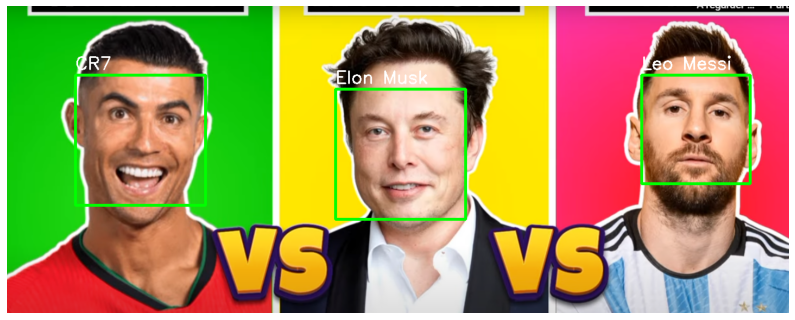

In [10]:
img = cv2.imread("elon_cristiano_messi.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect faces
face_locations = face_recognition.face_locations(img_rgb)
face_encodings = face_recognition.face_encodings(img_rgb, face_locations)
print("Number of faces found:", len(face_encodings))

# Loop over each face
for face_encod, face_loc in zip(face_encodings, face_locations):
    matches = face_recognition.compare_faces(encodeListKnown, face_encod)
    face_distances = face_recognition.face_distance(encodeListKnown, face_encod)
    
    if len(matches) > 0:
        face_index = np.argmin(face_distances)
        
        if matches[face_index]:
            name = classNames[face_index]
            print(name)

            y1, x2, y2, x1 = face_loc
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)
            cv2.putText(img_rgb, name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Show result
#img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
#cv2.imshow("Identified Faces", img_bgr)
plt.figure(figsize = (14,7))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()